#**Práctica 2: Herramientas para Machine Learning**

Curso: Inteligencia Artificial para Ingenieros

Prof. Carlos Toro N. (carlos.toro.ing@gmail.com)

2022

* En esta práctica veremos algunas de las librerías más usadas en temas de machine learning, entre estas: Numpy, Pandas, Matplotlib y Sci-kit Learn.

* Estas librerías serán importanes para los procesos de lectura de datos, exploración inicial de los datos, limpieza de datos, pre-procesamiento de datos, generación y evaluación de modelos, visualización etc.

##**3. Pandas**

Pandas es una librería construida sobre NumPy, y proporciona la implementación de objetos llamados `DataFrame`. Estos son en esencia arreglos multidimensionales a los que se le agregan etiquetas en las filas y columnas. [Aquí](https://pandas.pydata.org/) se puede encontrar la documentación de la misma.

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2560px-Pandas_logo.svg.png width="500">

**Previo:**

Antes de iniciar con pandas, veamos la estructura de datos tipo diccionario:

![Image in a markdown cell]( https://www.101computing.net/wp/wp-content/uploads/PythonDictionary.png)

[fuente](https://www.101computing.net/nato-phonetic-alphabet/)

In [ ]:
dict_world = {
    "country": ['Chile','Argentina','Mexico'],
    "capital": ['Santiago de Chile','Buenos Aires','CDMX'],
    "population": [15.89,13.90,14.13]
} # compusto de keys y values, no tienen un orden, los valores se acceden a través de las keys

print(dict_world)
print(dict_world['country'])
print(dict_world['population'][0])# primer elemento de la lista (valor) con key population

In [ ]:
for x in dict_world: #equivalente a escribir for x in dict_world.keys()
    print(x)

In [ ]:
for x in dict_world.values():
    print(x)

## 3.1 Creación de datos en formato Pandas

**Importamos Pandas**

In [ ]:
import pandas as pd # importamos pandas

Estructura de un dataframe:

<img src=https://pynative.com/wp-content/uploads/2021/02/dataframe.png width="450">

[fuente](https://pynative.com/python-pandas-dataframe/)


* Este tipo de datos es tabular. Cada fila representa una "muestra" (sample). En el campo del machine learning o estadística descriptiva, se usan términos equivalentes como "observación" o "instancia".

* Cada columna representa un tipo de información que ha sido coleccionada y son llamados  "características" (features). En el campo del machine learning y estadística descriptiva, se usan términos equivalentes como "variable", "atributo", o "predictor".

In [ ]:
# Creamos un dataframe a partir del diccionario que creamos previamente
world_df = pd.DataFrame(dict_world)
world_df
# por defecto pandas asigna un índice a cada entrada o fila

In [ ]:
world_df.index = ["CH","AR","MX"]# también podemos cambiar los nombres de los índices de las filas
print(world_df)

In [ ]:
print(world_df["capital"])# para acceder solo a la columna de capitales

In [ ]:
type(world_df["capital"]) # es de tipo series, otro tipo de datos de pandas

In [ ]:
print(world_df[["capital"]])# al hacer esto devuelvo dato de tipo dataframe

In [ ]:
type(world_df[["capital"]])

Además podemos consultar partes del DataFrame, consultar etiqueteas en las filas y columnas y valores por separado:

In [ ]:
columnas = world_df.columns
filas    = world_df.index
valores  = world_df.values

print('Columnas: ', columnas, '\nFilas: ', filas)
print(valores, type(valores))  # Los valores son una matriz de NumPy!!

**En resumen**, podemos decir que el formato **Series** se puede entender como una **tabla con una sola columna**, aunque también podemos verla como una lista donde cada elemento tiene una etiqueta, un **índice** el cual por defecto es un número entero de la posición del elemento.

<center>
    <img width="12%" src="https://pandas.pydata.org/docs/_images/01_table_series.svg">
</center>

Mientras que los **DataFrames** son más complejos que las Series, ya que ahora tenemos una **tabla con varias columnas**. En este caso, tendremos **índices** para cada fila y también etiquetas para las **columnas**. Los valores por defecto son también enteros que indican la posición.

<center>
    <img width="30%" src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg">
</center>

## 3.2 Indexación de datos por etiqueta o por posición


Trabajemos sobre el mismo DataFrame anterior:

In [ ]:
world_df

Podemos seleccionar una o varias **columnas** específicas de un DataFrame utilizando las etiquetas.

De manera similar, podemos seleccionar **filas** utilizando el índice. Podemos seleccionar una o varias filas y se crea también un nuevo **DataFrame**

Para seleccionar utilizando las **etiquetas** (nombres de filas y columnas) usamos el método **loc()**. Funciona como sigue:

```python
# Seleccionamos una sola columna.
serie_columna = df.loc[:, ['Columna1']]

# Seleccionamos más de una columna.
df_columnas = df.loc[:, ['Columna1','Columna2']]

# Seleccionamos más de una fila.
df_filas = df.loc[['Indice1', 'Indice2'], :]
```
Es importante notar que esta selección no afecta al DataFrame original, y que además lo que no se selecciona se conserva (por ejemplo, al seleccionar una sola columna, el nuevo DataFrame conserva todas las filas). Veamos un ejemplo con los datos anteriores.


In [ ]:
world_df.loc[["CH","MX"],:]# todas las columnas para esas filas

In [ ]:
world_df.loc[["CH","MX"],["country","capital"]]# solo algunas columnas de esas filas

Podemos seleccionar también usando la posición con el método **iloc()**.

```python
# Seleccionamos las primeras 2 columnas.
df_columnas = df.iloc[:, 0:1]
```

En el ejemplo anterior:

In [ ]:
world_df.iloc[[0]]# solo registro de la primera posición o fila

In [ ]:
world_df.iloc[[0,2]]

,country,capital,population
CH,Chile,Santiago de Chile,15.89
MX,Mexico,CDMX,14.13


In [ ]:
# se puede hacer lo mismo con las columnas
world_df.iloc[[0,2],[0,1]]

,country,capital
CH,Chile,Santiago de Chile
MX,Mexico,CDMX


¿cuándo usar solo una u otra?
`iloc` sería adecuado cuando los nombres de los registros sean demasiado engorrosos, en ese caso podría ser mejor usar indices en lugar
de etiquetas.

Como pandas está basado en numpy, también se pueden filtrar datos usando sintaxis de numpy, por ejemplo para filtrado

In [ ]:
world_df["population"] >14

In [ ]:
world_df[world_df["population"]>14]

Como recorrer elementos con ciclo for

In [ ]:
for i, record in world_df.iterrows():
    print(i+": "+record.capital)

Por último, se pueden crear DataFrames desde NumPy Arrays, como sigue:

In [ ]:
# importar módulos
import pandas as pd
import numpy as np

# creamos un numpy array
array = np.array([[1, 1, 1],
                  [2, 4, 8],
                  [3, 9, 27],
                  [4, 16, 64],
                  [5, 25, 125],
                  [6, 36, 216],
                  [7, 49, 343]])

# creamos una lista con los indices de las filas
index_values = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# creating una lista con los nombres de las columnas
column_values = ['número', 'cuadrados', 'cubos']

# crear el dataframe
df = pd.DataFrame(data = array,
                  index = index_values,
                  columns = column_values)

# mostramos el dataframe
df

En el ejemplo anterior, quizás nos interesaría cambiar los índices de cada fila por los números de la primera columna, esto lo podemos hacer como sigue:

In [ ]:
df.set_index('número', inplace = True)
df

¿Vimos como transformar algunas estructuras de datos a pandas DataFrames, cómo hacemos lo contrario? (Investigar)

## 3.3 Trabajando con datos de diferente formato

Con Pandas podemos **cargar datos** de archivos externos, los cuales pueden estar en internet o el propio disco duro. Por lo general en Pandas se usan datos tabulados (tablas), y los tipos de archivos desde los que podemos cargar datos [son varios](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html). Los más comunes son archivos con _valores separados por comas_ o CSV, por sus siglas en inglés, con extensión **.csv** y archivos de Excel con extensión **.xlsx**.


```python
# Para importar un archivo csv
datos = read_csv('nombre_del_archivo.csv')

# Para importar un archivo de excel
datos = read_excel('nombre_del_archivo.xlsx')
# En el caso de archivos excel, se puede requerir una versión más actualizada de pandas, en colab actualizar como:
!pip install --upgrade pandas
!pip install --upgrade xlrd
```

<center>
    <img width="90%" src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">
</center>

Hay más tipos de archivos válidos, como **.html** o **.json** y se importan al igual que los ejemplos anteriores. De la misma manera en la que cargamos datos, podemos guardar un DataFrame o una Series en un archivo con extensión válida:

```python
# Guardamos los datos en un archivo CSV
datos.to_csv('datos_guardados.csv')
```

Por ejemplo, guardemos el DataFrame generado mas arriba en un archivo CSV.

In [ ]:
world_df.to_csv('datos_guardados.csv')

### Cargando conjuntos de datos

* Usaremos la función pd.read_csv()

* 3 formas de leer archivos csv con jupyter y colab:

i) conociendo la url donde se encuentra el archivo:

ii) subiendolo desde el disco duro local (en colab), help: https://colab.research.google.com/notebooks/io.ipynb

```python
from google.colab import files
files.upload()
```
iii) conociendo la ubicación en disco duro local del archivo, ideal para iniciar, trabajar con el archivo en la misma carpeta donde está el notebook o script:
```python
# podemos leer directo el archivo usando su nombre si tene el notebook en la misma carpeta
datos = pd.read_csv('file_name.csv')

# usar la dirección completa de la carpeta diferente al directorio del notebook:
datos = pd.read_csv(r'C:\Users\resto de la dirección donde está el archivo\file_name.csv')
```

En esta práctica usaremos el dataset de datos de censo en USA 1994, detalles de este se pueden encontrar en [OpenML](http://openml.org/).

El dataset se encuentra disponible como un archivo CSV (Valores Separados por Coma) y usaremos pandas para leerlo.

In [ ]:
# Leeremos los datos desde una URL
adult_census = pd.read_csv("https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/adult-census.csv")

El objetivo con estos datos será predecir más adelante si una persona gana sobre 50K al año usando datos heterogéneos tales como edad, empleo, educación, información familiar, etc.

Algunos métodos importantes y comúnes necesarios para obtener un mejor entendimiento de los DataFrames y diagnosticar problemas potenciales en los datos son los siguientes:

- `.head()` imprime el encabezado de un DataFrame
- `.dtypes` imprime los tipos de datos de todas las columnas en el DataFrame
- `.info()` proporciona una visión de los tipos de datos de las columnas y valores perdidos en el DataFrame
- `.describe()` entrega un resumen con estadísticos de las columnas numéricas en el DataFrame
- `.isna().sum()` permite saber el número de valores verdidos por columna en el DataFrame
- `.unique()` encuentra el número de valores únicos en una columna del DataFrame

**Las variables (columnas) en el dataset**

Mostremos las primeras filas del DataFrame con el método `head`

In [ ]:
adult_census.head()# puede recibir como argumento el número de filas que queremos desplegar, por defecto despliega las primeras 5

El dataset contiene datos tanto numéricos como categóricos. Los valores numéricos toman valores continuos, por ejemplo `"edad"`. Los valores categórigos pueden tener un número finito de valores, por ejemplo `"sex"`, aunque en este caso como veremos se identifican con el tipo `object`.

En este DataFrame podemos saber el número de muestras (filas) y número de  columnas disponibles en el conjunto de datos:

In [ ]:
print(f"El conjunto de datos contiene {adult_census.shape[0]} muestras y "
      f"{adult_census.shape[1]} columnas")

El conjunto de datos contiene 48842 muestras y 14 columnas


Dado que el objetivo será más adelante predecir la última columna (columna objetivo `"class"`), podemos saber el número de variables o características contando el número de columnas y restando 1.

In [ ]:
print(f"El conjunto de datos contiene {adult_census.shape[1] - 1} características (variables predictoras).")

### Inspeccionando los datos

A simple vista podemos rápidamente diagnosticar algunos problemas en los datos, tales como datos perdidos en algunas columas que están representados con el string `?`, que pudieron ser producto de una mala captura por ejemplo. Esto será crítico en variables numéricas o categóricas que pueden afectar algunos algoritmos y requerirán un tratamiento especial.  

In [ ]:
# Impresión de los tipos de los datos del DataFrame
adult_census.dtypes

El tipo de dato `object` hace referencia a valores de tipo string o de tipo mezclado entre strings y numéricos.

Obtenemos los nombres de las columnas con valores numéricos y categóricos:

In [ ]:
import numpy as np
cols_num =adult_census.select_dtypes([np.number]).columns
print(f"Tenemos {len(cols_num)} columnas con valores numéricos, estas son: \n{cols_num}")

In [ ]:
cols_cat=adult_census.select_dtypes(object).columns
print(f"Tenemos {len(cols_cat)} columnas con valores categóricos, estas son: \n{cols_cat}")

El método `describe()` es usado para calcular algunos estadísticos como el promedio y percentiles.

In [ ]:
adult_census.describe()

En los ejercicios que haremos más adelante, la columna llamada class será nuestra variable objetivo (i.e., la variable a predecir). Las dos clases posibles son `<=50K` (sueldo bajo) y `>50K` (sueldo alto). El problema de predicción resultante es por consiguiente un problema de clasificación binaria, donde se usarán las otras columnas como variables de entrada para nuestro modelo.

In [ ]:
adult_census["class"].value_counts()

Notar que las clases están levemente desbalanceadas, i.e. hay mas muestras de una de las clases comparadas a las otras. Este es un problema que aparece a menudo en problemas reales y puede requerir tratamientos especiales al construir modelos predictivos.

**Visualización simple de la variable objetivo**

In [ ]:
sueldo_bajo = adult_census["class"].value_counts()[0]
sueldo_alto = adult_census["class"].value_counts()[1]

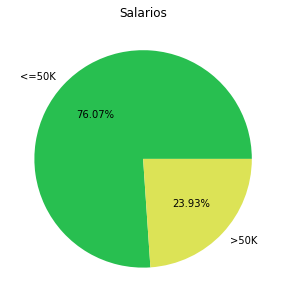

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))

plt.pie([sueldo_bajo,sueldo_alto],labels = ['<=50K','>50K'],colors = ['#28bf50','#dce356'], autopct = '%.2f%%')# para colores se puede usar color picker de google
plt.title('Salarios')
#plt.savefig('pie_chart.png',dpi = 300)
plt.show()

**Visualización de la distribución de algunas características (columnas)**

In [ ]:
_ = adult_census.hist(figsize=(20, 14))

**Tip**
En la celda anterior se llamó a la función de la siguiente forma: _ = func(). Hacer esto evita mostrar la salida de func() que en este caso no es tan útil.

A partir de los histogramas anteriores podemos decir algo de las variables numéricas:

* `"age"`: no hay muchos datos para `age > 70`. De hecho, la descripción del dataset nos dice que las personas retiradas se han dejado fuera   (`hours-per-week > 0`);
* `"education-num"`: el peak está entre 10 y 13;
* `"hours-per-week"` el peak está en 40, este era probablemente el número estándar de las horas de trabajo cuando se tomaron los datos;
* muchos de los valores de `"capital-gain"` y `"capital-loss"` son cercanos a cero.

## Ejercicios de Práctica

**Ejercicio 1**. **Conjunto de datos de fuerza de compresión de concreto.**

<center><img src=https://www.researchgate.net/profile/Marcin-Malek/publication/345360243/figure/fig1/AS:954773599690753@1604647173413/Relationship-between-density-and-compressive-strength-of-hardened-foamed-concrete-Images.png width="450"></center>

[fuente](https://www.researchgate.net/figure/Relationship-between-density-and-compressive-strength-of-hardened-foamed-concrete-Images_fig1_345360243)

Usando pandas, cargar el conjunto de datos de concreto que se encuentran aquí: https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

Se pide:

**a)** Explicar el propósito del conjunto de datos. Variables predictoras, variable target u objetivo.

**b)** Leer los datos desde la web y cargarlos en un DataFrame.

**c)** Describir el conjunto de datos en términos estadísticos y graficar algunas de las variables más importantes, ya sea con histogramas o con gráficos de caja. Comentar los resultados. Nota: graficar por separado la variable objetivo.

**Nota:** simplificar los nombres de las variables precitoras con la siguiente lista:

In [ ]:
Nombre_columnas = ['cement','slag','fly_ash','water','superplasticizer','coarse_aggregate','fine_aggregate','age','csMPa']

In [ ]:
#@title Respuesta actualizar versión de pandas para leer archivos excel
!pip install --upgrade pandas
!pip install --upgrade xlrd

In [ ]:
#@title Respuesta cómo cargar los datos
import pandas as pd
datos = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')
datos

In [ ]:
# Código aquí

**Ejercicio 2**. **Especies de pingüinos.**

Imaginen que estamos interesados en predecir la especie de un pingüino basado en dos mediciones corporales: culmen length y culmen depth.


<center><img src=https://education.rstudio.com/blog/2020/07/palmerpenguins-cran/gorman-penguins.jpg width="450"></center>

<center><img src=https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png width="450"></center>

[fuente](https://education.rstudio.com/blog/2020/07/palmerpenguins-cran/)

Se pide lo siguiente:

**A.** Cuáles son las variables predictoras? cuál es la variable objetivo?

Respuesta:

**B.** El conjunto de datos se encuentre en: https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/penguins_classification.csv , cargarlos con `pandas` en un `DataFrame`

In [ ]:
#Código aquí

**C.** Mostrar algunas muestras de los datos. Cuántas son variables numéricas? cuántas son variables categóricas?

In [ ]:
#Código aquí

**D.** Cuáles son las diferentes especies de pingüinos disponibles en el conjunto de datos y cuántas muestra de cada especie hay? Tip: seleccionar la columna adecuada y usar el método `value_counts`

In [ ]:
#Código aquí

**E.** Graficar los histogramas de las variables numéricas

In [ ]:
#Código aquí

**F.** Mostrar la distribución de las caracteristicas/variables para cada especie.
Tip: Usaremos la librería `seaborn`, otra libreria para generar visualizaciones. En particular usar `seaborn.pairplot`. Primero importar la librería como `import seaborn`.


In [ ]:
#Código aquí

Observando las distribuciones, qué tan dificil creen que sería clasificar los pingüinos usando solamente las variables `culmen depth` y `culmen length`?